## 3.0 Data Exploration

This notebook aims to explore the data and to visually identify any useful features to explain the fatality label. This notebook would provide full details on what data being investigated and remarkable observations.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('datas/data_cleaned.csv')
data.head()

,REPORT_ID,UND_UNIT_NUMBER,CASUALTY_NUMBER,cas_type,cas_gender,cas_age,cas_pos_in_veh,thrown_out,fatality,seat_belt,...,time,area_speed,acc_pos,hor_align,ver_align,moist_cond,wea_cond,dayNight,crash_type,traf_ctrls
0,2017-1-15/08/2019,1,1,Driver,Female,34.000000,Driver,Not Thrown Out,NotFatal,Worn,...,peak,60,T-Junction,Straight road,Level,Dry,Not Raining,Daylight,Rear End,No Control
1,2017-5-15/08/2019,2,1,Driver,Female,41.000000,Driver,Not Thrown Out,NotFatal,Worn,...,peak,60,T-Junction,Straight road,Level,Dry,Not Raining,Daylight,Right Turn,No Control
2,2017-9-15/08/2019,1,1,Driver,Male,39.889159,Driver,Not Thrown Out,NotFatal,Worn,...,peak,60,Divided Road,Straight road,Level,Dry,Not Raining,Daylight,Right Angle,No Control
3,2017-10-15/08/2019,1,1,Driver,Male,19.000000,Driver,Not Thrown Out,NotFatal,Worn,...,peak,60,Freeway,"CURVED, VIEW OPEN",Level,Dry,Not Raining,Daylight,Head On,No Control
4,2017-10-15/08/2019,2,1,Driver,Male,48.000000,Driver,Not Thrown Out,NotFatal,Worn,...,peak,60,Freeway,"CURVED, VIEW OPEN",Level,Dry,Not Raining,Daylight,Head On,No Control


In [4]:
data.columns

Index(['REPORT_ID', 'UND_UNIT_NUMBER', 'CASUALTY_NUMBER', 'cas_type',
       'cas_gender', 'cas_age', 'cas_pos_in_veh', 'thrown_out', 'fatality',
       'seat_belt', 'unit_type', 'lic_type', 'unit_movement', 'n_occupants',
       'stat_area', 'total_units', 'cas_total', 'day', 'time', 'area_speed',
       'acc_pos', 'hor_align', 'ver_align', 'moist_cond', 'wea_cond',
       'dayNight', 'crash_type', 'traf_ctrls'],
      dtype='object')

Since different groups in each cateogrical feature have imbalanced number of occurrences, the method-table_summary will be used to calculate the proportion - fatal/non-fatal causality out of the total occurrence in each group.

In [5]:
def table_summary(data, sub_groups, group_total):
    print("Summary table of ", sub_groups)
    summary= pd.DataFrame(data.groupby(by=sub_groups).size()/data.groupby(by=group_total).size(),columns=["%"]).unstack()
    summary= round(summary*100,2)
    summary.fillna(0,inplace=True)
    summary['Total number of crashes']= data.groupby(by=group_total).size()
    return summary

## 3.1 Label data

In [6]:
## this method is to add percent on top of bar in bar charts
def print_percent(ax,data):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}%'.format(100*height/float(len(data))),
                ha="center",bbox=dict(facecolor='red', alpha=0.5))

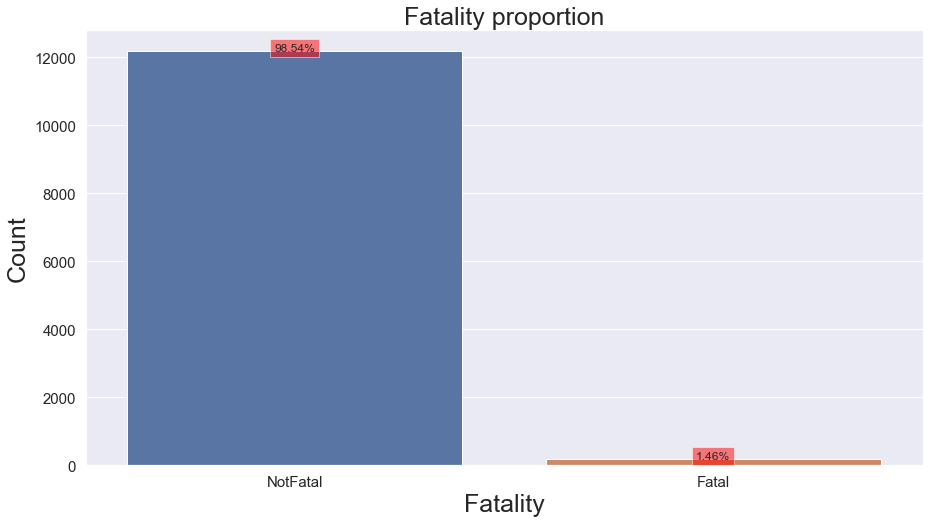

In [7]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(x="fatality", data=data)
ax.set_title('Fatality proportion',fontsize=25)
ax.set_ylabel('Count',fontsize=25)
ax.set_xlabel('Fatality',fontsize=25)
ax.tick_params(labelsize=15)
print_percent(ax,data)
plt.show()

**Observation** <br>
This plot reflects that fatal crashes have an extremely low occurrence, as only 1.46% of crash end with a fatal outcome, where as a non-fatal outcome is equivilant to 98.54% which is approximately 12000 cases associated with non-fatal causality.

## 3.2 Feature exploration

This section is to explore the relationship between grouped categories and fatality label. 

### 3.2.1 Gender

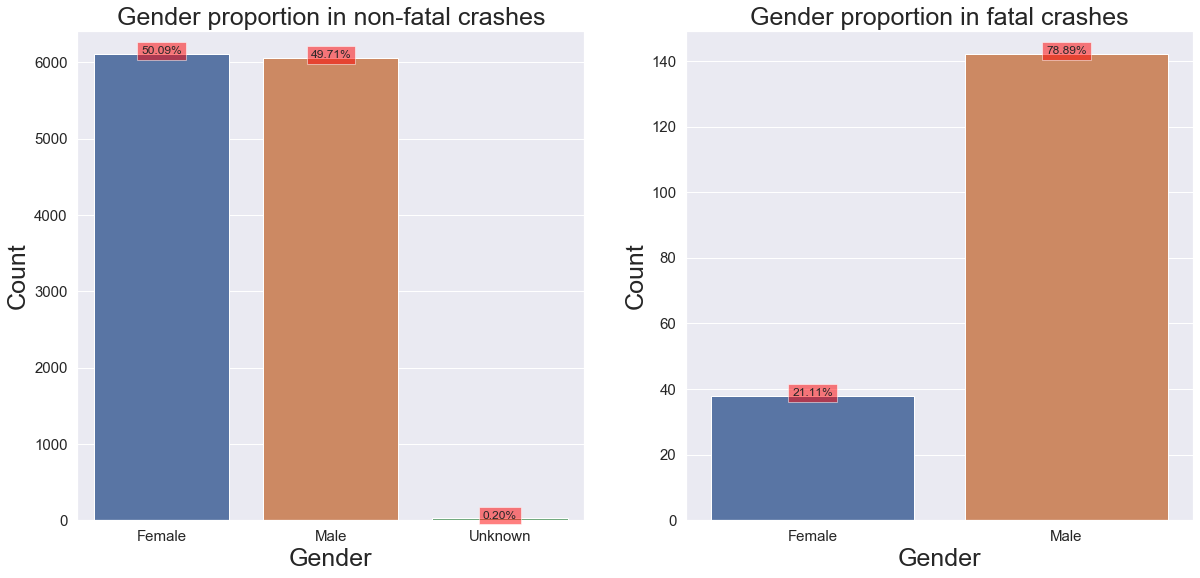

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,9))
sns.countplot(x="cas_gender", data=data.loc[data['fatality']=='NotFatal'],ax=ax1);
ax1.set_title('Gender proportion in non-fatal crashes',fontsize=25)
ax1.set_ylabel('Count',fontsize=25)
ax1.set_xlabel('Gender',fontsize=25)
ax1.tick_params(labelsize=15)
sns.countplot(x="cas_gender", data=data.loc[data['fatality']!='NotFatal'],ax=ax2);
ax2.set_title('Gender proportion in fatal crashes',fontsize=25)
ax2.set_ylabel('Count',fontsize=25)
ax2.set_xlabel('Gender',fontsize=25)
ax2.tick_params(labelsize=15)

print_percent(ax1,data.loc[data['fatality']=='NotFatal'])
print_percent(ax2,data.loc[data['fatality']!='NotFatal'])

In [9]:
table_summary(data, ['cas_gender','fatality'],['cas_gender'])

Summary table of  ['cas_gender', 'fatality']


%          Total number of crashes
fatality   Fatal NotFatal                        
cas_gender                                       
Female      0.62    99.38                    6140
Male        2.29    97.71                    6197
Unknown     0.00   100.00                      24

**Observation** <br>
1. the bar chart on the top right indicates that there is a 51.78% gap between female and male in fatal groups
2. Non-fatal gender proporations reflect a similar rates that between both genders
3. The table summary suggests that the chance of males having fatalities in car accident is 2.29%
4. It was clear that most fatal crashes resulted in high male morality rates compared to female. This could be due to male drivers taking more risks and driving at higher speeds.

### 3.2.2 Casualty type

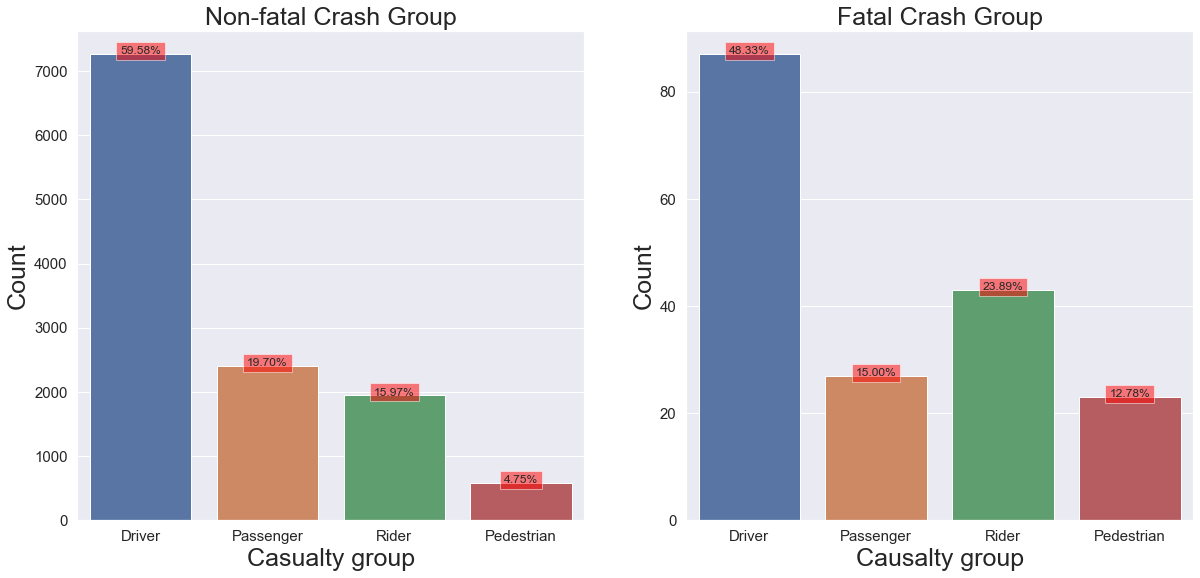

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,9))
sns.countplot(x="cas_type", data=data.loc[data['fatality']=='NotFatal'],ax=ax1, order=['Driver','Passenger','Rider','Pedestrian']);
ax1.set_title('Non-fatal Crash Group',fontsize=25)
ax1.set_ylabel('Count',fontsize=25)
ax1.set_xlabel('Casualty group',fontsize=25)
ax1.tick_params(labelsize=15)
sns.countplot(x="cas_type", data=data.loc[data['fatality']!='NotFatal'],ax=ax2,order=['Driver','Passenger','Rider','Pedestrian']);
ax2.set_title('Fatal Crash Group',fontsize=25)
ax2.set_ylabel('Count',fontsize=25)
ax2.set_xlabel('Causalty group',fontsize=25)
ax2.tick_params(labelsize=15)

print_percent(ax1,data.loc[data['fatality']=='NotFatal'])
print_percent(ax2,data.loc[data['fatality']!='NotFatal'])


In [11]:
table_summary(data, ['cas_type','fatality'],['cas_type'])

Summary table of  ['cas_type', 'fatality']


%          Total number of crashes
fatality   Fatal NotFatal                        
cas_type                                         
Driver      1.18    98.82                    7345
Passenger   1.11    98.89                    2427
Pedestrian  3.83    96.17                     601
Rider       2.16    97.84                    1988

**Observation** <br>
1. Most casualties are associated with drivers in both groups
2. Both drivers and riders are the top 2 cateogories that have fatal incidents in road accidents
3. Pedestrian and Rider have the higher fatality rate, as it has the lowest occurrence of casualities and higher number of causalties relatively
4. This might suggest that use of vehicle might protect users from fatalies in car crashes.

### 3.2.3 Age

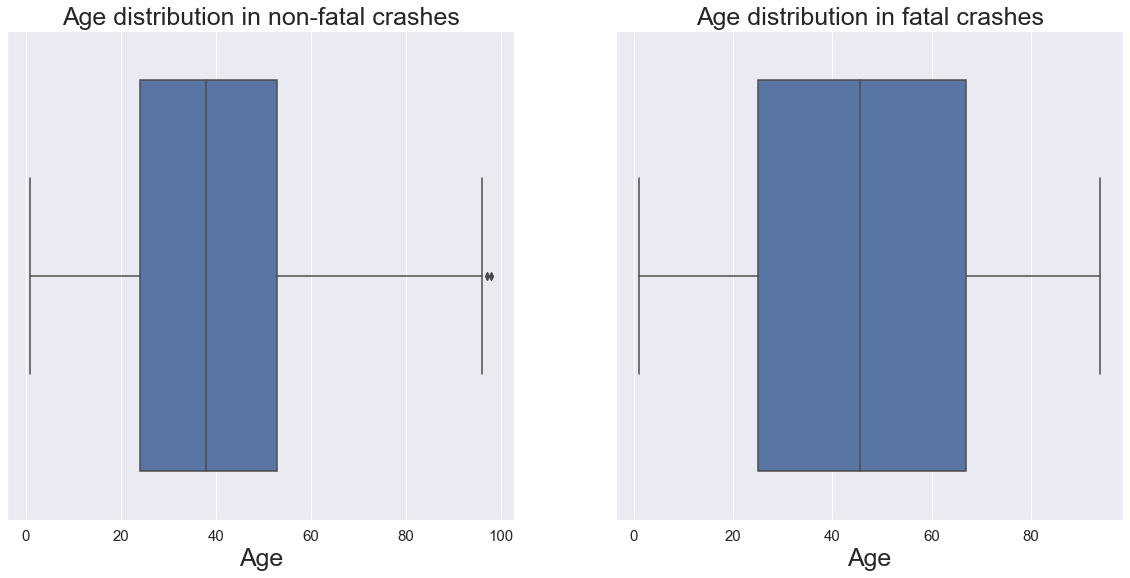

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,9))
sns.boxplot(data.loc[data['fatality']=='NotFatal']["cas_age"],ax=ax1);
ax1.set_title('Age distribution in non-fatal crashes',fontsize=25)
sns.boxplot(data.loc[data['fatality']!='NotFatal']["cas_age"],ax=ax2);
ax2.set_title('Age distribution in fatal crashes',fontsize=25)
ax1.set_xlabel('Age',fontsize=25)
ax1.tick_params(labelsize=15)
ax2.set_xlabel('Age',fontsize=25)
ax2.tick_params(labelsize=15)

**Observation** <br>
1. The age ranges for non-fatal catergory is slightly larger.
2. The interquartile range of the fatality causalty is wider, which shows a wider distribution with the age.
3. The median age in fatal group is higher, suggesting that fatal group is associated with older poeple.

In [13]:
table_summary(data, ['time','fatality'],['time'])

Summary table of  ['time', 'fatality']


%          Total number of crashes
fatality Fatal NotFatal                        
time                                           
off-peak  1.64    98.36                    8647
peak      1.02    98.98                    3714

### 3.2.4 Seat belt

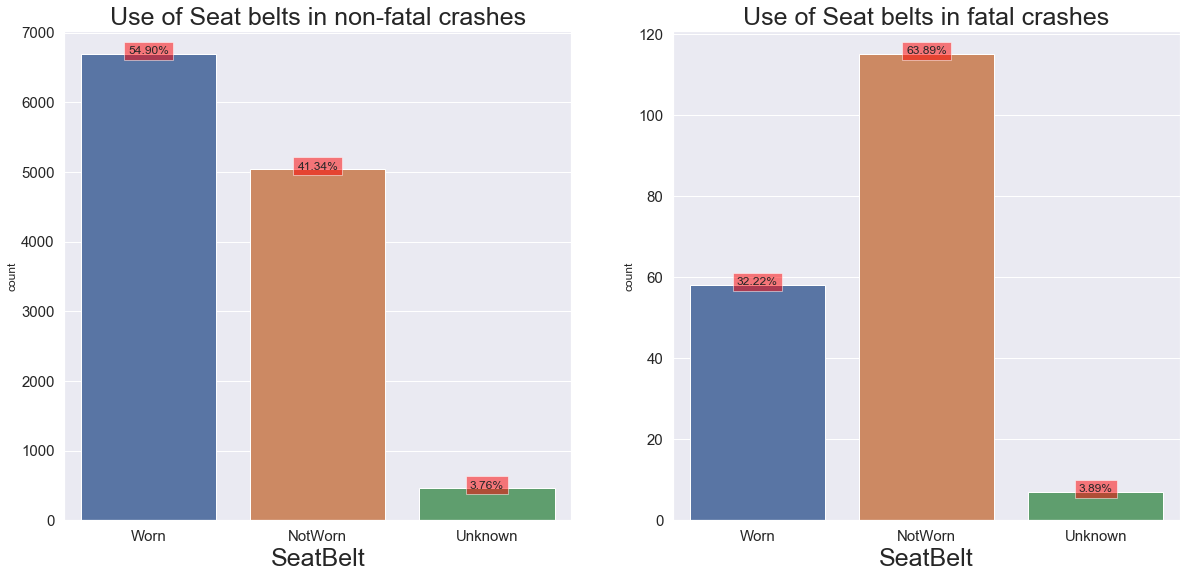

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,9))
sns.countplot(x="seat_belt", data=data.loc[data['fatality']=='NotFatal'],ax=ax1);
ax1.set_title('Use of Seat belts in non-fatal crashes',fontsize=25)
sns.countplot(x="seat_belt", data=data.loc[data['fatality']!='NotFatal'],ax=ax2);
ax2.set_title('Use of Seat belts in fatal crashes',fontsize=25)
ax1.set_xlabel('SeatBelt',fontsize=25)
ax1.tick_params(labelsize=15)
ax2.set_xlabel('SeatBelt',fontsize=25)
ax2.tick_params(labelsize=15)
print_percent(ax1,data.loc[data['fatality']=='NotFatal'])
print_percent(ax2,data.loc[data['fatality']!='NotFatal'])

In [15]:
table_summary(data, ['seat_belt','fatality'],['seat_belt'])

Summary table of  ['seat_belt', 'fatality']


%          Total number of crashes
fatality  Fatal NotFatal                        
seat_belt                                       
NotWorn    2.23    97.77                    5151
Unknown    1.51    98.49                     465
Worn       0.86    99.14                    6745

**Observation** <br>
1. Out of all fatal causalties, 63.89% did not wear sealt belt.
2. Summary table indicates, the fatal rate is 2.23% out of all causalties with no use of seat belts.
3. This feature might suggest that the use of seat belt can reduce the chance of being fatal in accident.
4. This feature might be a significant driving factor in explaining variability.

### 3.2.5 Day/Night

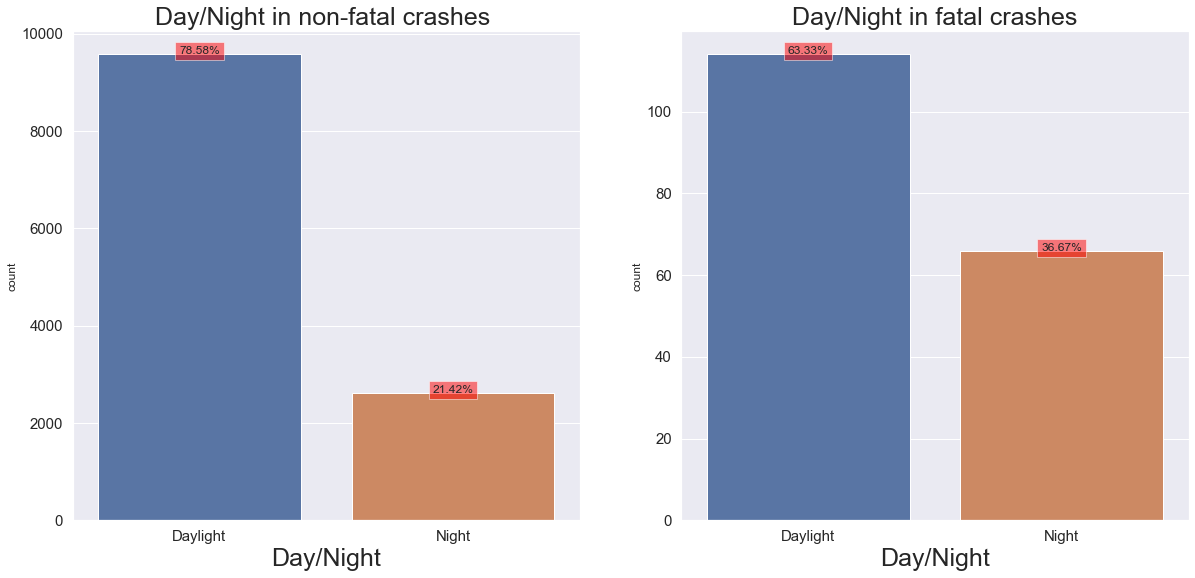

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,9))
sns.countplot(x="dayNight", data=data.loc[data['fatality']=='NotFatal'],ax=ax1);
ax1.set_title('Day/Night in non-fatal crashes ',fontsize=25)
sns.countplot(x="dayNight", data=data.loc[data['fatality']!='NotFatal'],ax=ax2);
ax2.set_title('Day/Night in fatal crashes',fontsize=25)
ax1.set_xlabel('Day/Night',fontsize=25)
ax1.tick_params(labelsize=15)
ax2.set_xlabel('Day/Night',fontsize=25)
ax2.tick_params(labelsize=15)
print_percent(ax1,data.loc[data['fatality']=='NotFatal'])
print_percent(ax2,data.loc[data['fatality']!='NotFatal'])

In [17]:
table_summary(data, ['dayNight','fatality'],['dayNight'])

Summary table of  ['dayNight', 'fatality']


%          Total number of crashes
fatality Fatal NotFatal                        
dayNight                                       
Daylight  1.18    98.82                    9686
Night     2.47    97.53                    2675

**Observation** <br>

1. Number of casualties taken place at night is signficantly lower compared to causalties during daylight
2. However, casualties during night time has 2.47% fatal rate, suggesting causalties in road accidents at night time have higher chance of being fatal.
3. The distribution for both these graphs are similar, suggesting that Day or night might not be a driving factor to explain the outcome of fatality

### 3.2.6 Weather condition

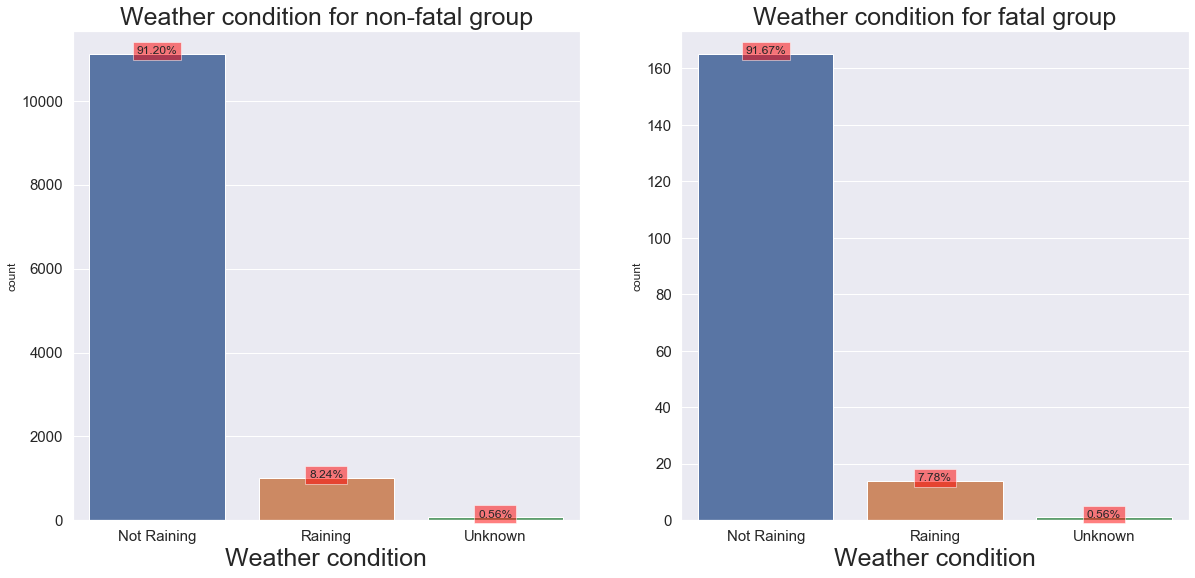

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,9))
sns.countplot(x="wea_cond", data=data.loc[data['fatality']=='NotFatal'],ax=ax1);
ax1.set_title('Weather condition for non-fatal group',fontsize=25)
sns.countplot(x="wea_cond", data=data.loc[data['fatality']!='NotFatal'],ax=ax2);
ax2.set_title('Weather condition for fatal group',fontsize=25)

ax1.set_xlabel('Weather condition',fontsize=25)
ax1.tick_params(labelsize=15)
ax2.set_xlabel('Weather condition',fontsize=25)
ax2.tick_params(labelsize=15)
print_percent(ax1,data.loc[data['fatality']=='NotFatal'])
print_percent(ax2,data.loc[data['fatality']!='NotFatal'])

**Observation** <br>

1. Table summarise the proportion of fatal and non-fatal cases under different weather conditions. 
2. Most causalties took place during non-raining periods as its number of causalties is 11274.
3. The fatal rates under different weather conditions are similar

### 3.2.7 Traffic controls

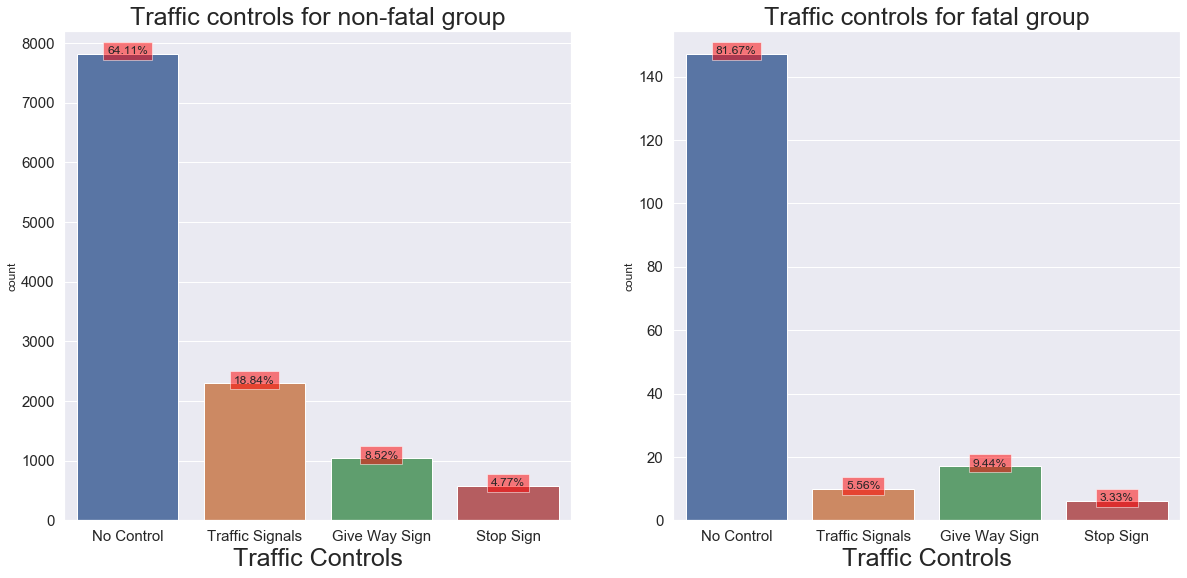

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,9))
sns.countplot(x="traf_ctrls", data=data.loc[data['fatality']=='NotFatal'],ax=ax1, order = ['No Control', 'Traffic Signals', 'Give Way Sign', 'Stop Sign']);
ax1.set_title('Traffic controls for non-fatal group',fontsize=25)
sns.countplot(x="traf_ctrls", data=data.loc[data['fatality']!='NotFatal'],ax=ax2, order = ['No Control', 'Traffic Signals', 'Give Way Sign', 'Stop Sign']);
ax2.set_title('Traffic controls for fatal group',fontsize=25)
ax1.set_xlabel('Traffic Controls',fontsize=25)
ax1.tick_params(labelsize=15)
ax2.set_xlabel('Traffic Controls',fontsize=25)
ax2.tick_params(labelsize=15)

print_percent(ax1,data.loc[data['fatality']=='NotFatal'])
print_percent(ax2,data.loc[data['fatality']!='NotFatal'])

In [20]:
table_summary(data, ['traf_ctrls','fatality'],['traf_ctrls'])

Summary table of  ['traf_ctrls', 'fatality']


%          Total number of crashes
fatality        Fatal NotFatal                        
traf_ctrls                                            
Give Way Sign    1.61    98.39                    1055
No Control       1.85    98.15                    7956
Other            0.00   100.00                      20
Roundabout       0.00   100.00                     438
Stop Sign        1.02    98.98                     587
Traffic Signals  0.43    99.57                    2305

**Observation** <br>

1. Most causalities are associated with places without traffic control for both groups, and no use of traffic controls has higher fatal rate- 1.85%, indicating that traffic control could be significant factor increasing the chance of being fatal in road accidents.
2. The proportion of fatal causalites associating with use of traffic controls is relatively lower, and this could be due to the use of traffic control. 

### 3.2.8 Area speed

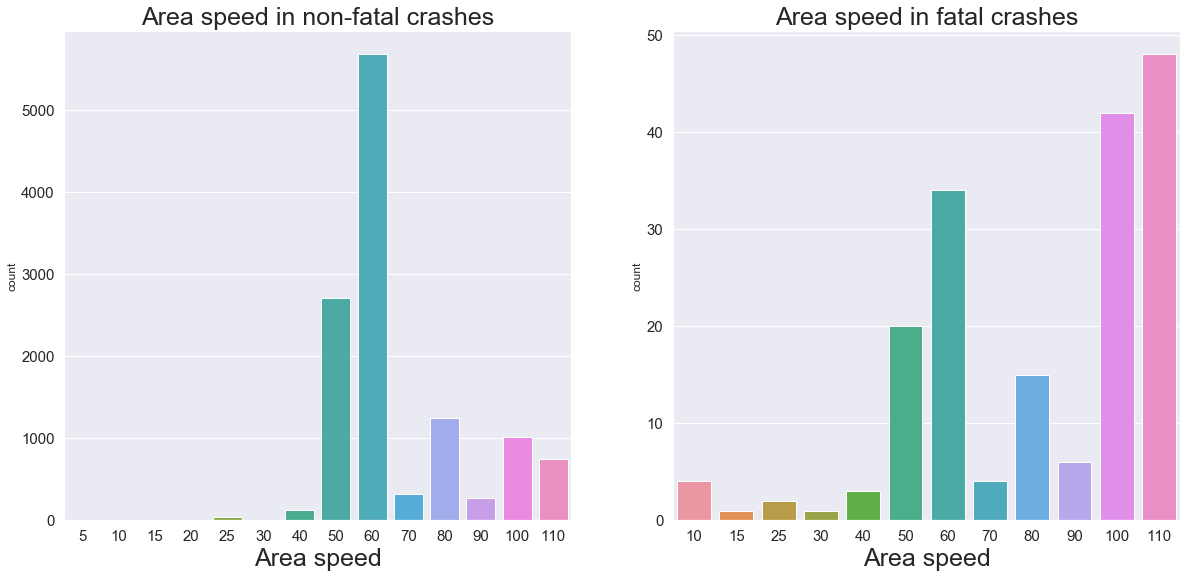

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,9))
sns.countplot(data.loc[data['fatality']=='NotFatal']["area_speed"],ax=ax1);
ax1.set_title('Area speed in non-fatal crashes',fontsize=25)
sns.countplot(data.loc[data['fatality']!='NotFatal']["area_speed"],ax=ax2);
ax2.set_title('Area speed in fatal crashes',fontsize=25)

ax1.set_xlabel('Area speed',fontsize=25)
ax1.tick_params(labelsize=15)
ax2.set_xlabel('Area speed',fontsize=25)
ax2.tick_params(labelsize=15)

In [22]:
table_summary(data, ['area_speed','fatality'],['area_speed'])

Summary table of  ['area_speed', 'fatality']


%          Total number of crashes
fatality    Fatal NotFatal                        
area_speed                                        
5            0.00   100.00                       1
10          30.77    69.23                      13
15          25.00    75.00                       4
20           0.00   100.00                       8
25           5.00    95.00                      40
30          25.00    75.00                       4
40           2.26    97.74                     133
50           0.73    99.27                    2734
60           0.60    99.40                    5712
70           1.23    98.77                     324
80           1.19    98.81                    1260
90           2.18    97.82                     275
100          3.97    96.03                    1059
110          6.05    93.95                     794

**Observation** <br>

1. Non-fatal group has negatively-skewed distribution, suggesting non-fatal causalties took place at lower speed
2. Fatal group has positvely-skewed distribution, suggesting that fatalities are more likely to take place at higher speeds.
3. Fatalities taken places at speed of 10,15,25,30 are usually higher, and this is due to the small sample in these groups
4. higher speeds are expected to have higher fatality rates

### 3.2.9 Crash type

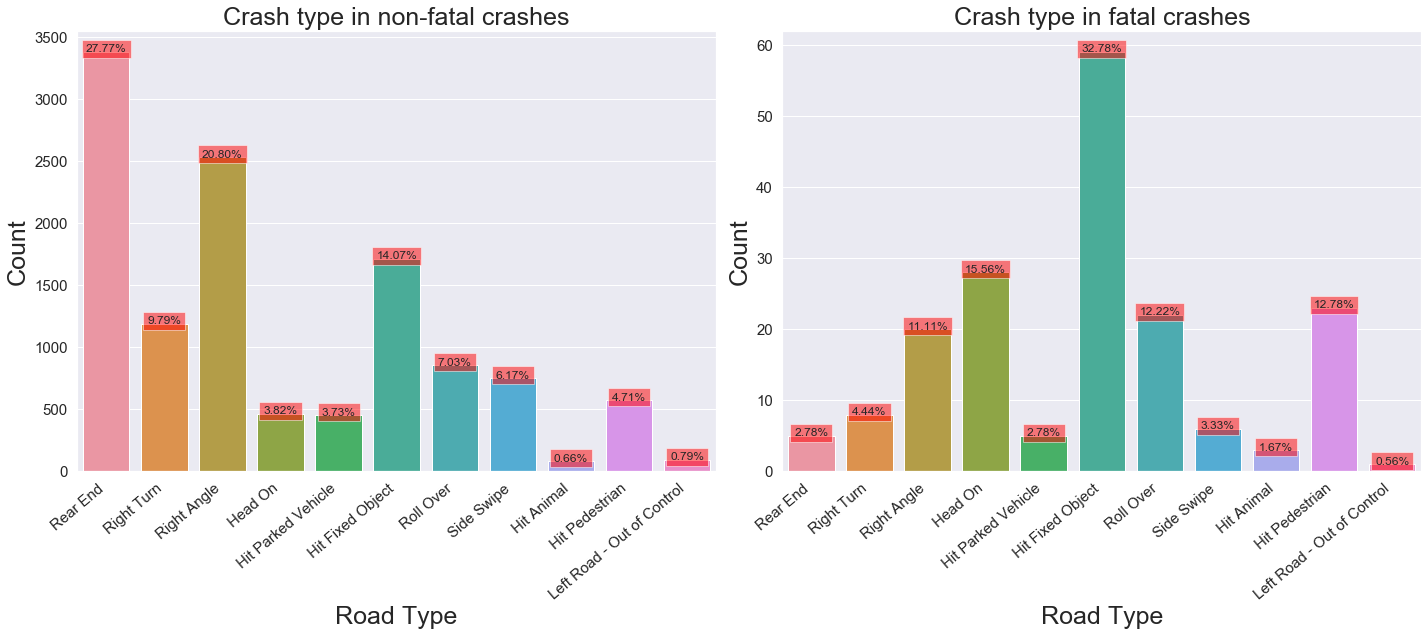

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,9))
sns.countplot(x="crash_type", data=data.loc[data['fatality']=='NotFatal'],ax=ax1, order = ['Rear End','Right Turn', 'Right Angle', 'Head On', 'Hit Parked Vehicle', 'Hit Fixed Object', 'Roll Over', 'Side Swipe', 'Hit Animal', 'Hit Pedestrian', 'Left Road - Out of Control']);
ax1.set_title('Crash type in non-fatal crashes',fontsize=25)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
sns.countplot(x="crash_type", data=data.loc[data['fatality']!='NotFatal'],ax=ax2, order = ['Rear End','Right Turn', 'Right Angle', 'Head On', 'Hit Parked Vehicle', 'Hit Fixed Object', 'Roll Over', 'Side Swipe', 'Hit Animal', 'Hit Pedestrian', 'Left Road - Out of Control']);
ax2.set_title('Crash type in fatal crashes',fontsize=25)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax1.set_xlabel('Road Type',fontsize=25)
ax1.tick_params(labelsize=15)
ax2.set_xlabel('Road Type',fontsize=25)
ax2.tick_params(labelsize=15)
ax1.set_ylabel('Count',fontsize=25)
ax2.set_ylabel('Count',fontsize=25)

print_percent(ax1,data.loc[data['fatality']=='NotFatal'])
print_percent(ax2,data.loc[data['fatality']!='NotFatal'])
plt.tight_layout()
plt.show()

In [24]:
table_summary(data, ['crash_type','fatality'],['crash_type'])

Summary table of  ['crash_type', 'fatality']


%          Total number of crashes
fatality                   Fatal NotFatal                        
crash_type                                                       
Head On                     5.68    94.32                     493
Hit Animal                  3.57    96.43                      84
Hit Fixed Object            3.33    96.67                    1773
Hit Object on Road          0.00   100.00                      28
Hit Parked Vehicle          1.09    98.91                     459
Hit Pedestrian              3.85    96.15                     597
Left Road - Out of Control  1.03    98.97                      97
Other                       0.00   100.00                      52
Rear End                    0.15    99.85                    3388
Right Angle                 0.78    99.22                    2554
Right Turn                  0.67    99.33                    1200
Roll Over                   2.51    97.49                     878
Side Swipe                  0.79    99.21                     758

**Observation** <br>

1. 32.78% of fatalities are due to hitting fixed object,according to top-right bar plot 
2. Head On collision, Hit Pedestrian and Hit Fixed object are groups with higher total number of causalties and higher fatality rates
3. Hit Animals has 3.33% fatal rate but it might be insignificant due to the relatively small sample size

### 3.2.10 Road type

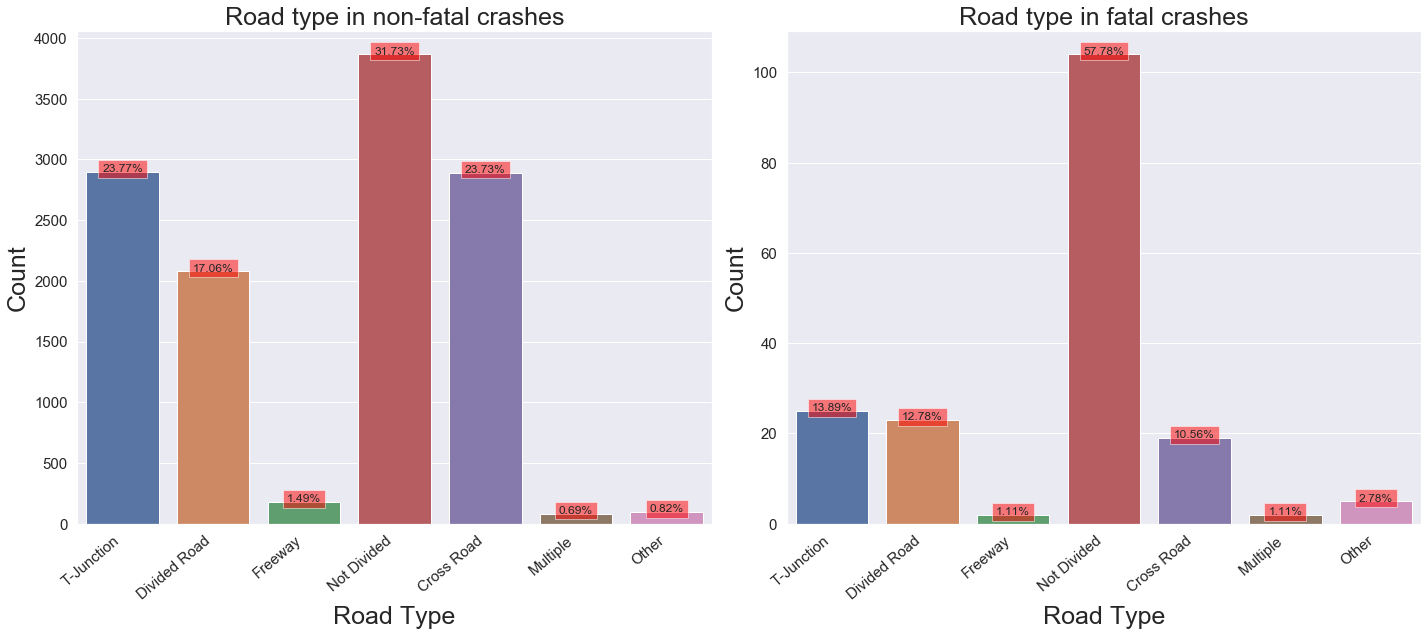

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,9))
sns.countplot(x="acc_pos", data=data.loc[data['fatality']=='NotFatal'],ax=ax1, order = ['T-Junction', 'Divided Road', 'Freeway', 'Not Divided', 'Cross Road', 'Multiple', 'Other']);
ax1.set_title('Road type in non-fatal crashes',fontsize=25)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
sns.countplot(x="acc_pos", data=data.loc[data['fatality']!='NotFatal'],ax=ax2, order = ['T-Junction', 'Divided Road', 'Freeway', 'Not Divided', 'Cross Road', 'Multiple', 'Other']);
ax2.set_title('Road type in fatal crashes',fontsize=25)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax1.set_xlabel('Road Type',fontsize=25)
ax1.tick_params(labelsize=15)
ax2.set_xlabel('Road Type',fontsize=25)
ax2.tick_params(labelsize=15)
ax1.set_ylabel('Count',fontsize=25)
ax2.set_ylabel('Count',fontsize=25)

print_percent(ax1,data.loc[data['fatality']=='NotFatal'])
print_percent(ax2,data.loc[data['fatality']!='NotFatal'])
plt.tight_layout()
plt.show()

In [26]:
table_summary(data, ['acc_pos','fatality'],['acc_pos'])

Summary table of  ['acc_pos', 'fatality']


%          Total number of crashes
fatality            Fatal NotFatal                        
acc_pos                                                   
Cross Road           0.65    99.35                    2910
Divided Road         1.09    98.91                    2101
Freeway              1.09    98.91                     184
Multiple             2.33    97.67                      86
Not Divided          2.62    97.38                    3969
Other                4.76    95.24                     105
Pedestrian Crossing  0.00   100.00                      85
T-Junction           0.86    99.14                    2921

**Observation** <br>

1. The both graph shows that accidents occurred more frequently were in roads not divided, its fatality rate is 2.62%, suggesting that roads that are not divided are more prone to road accidents.  

### 3.2.11 Horizontal position of of casualty

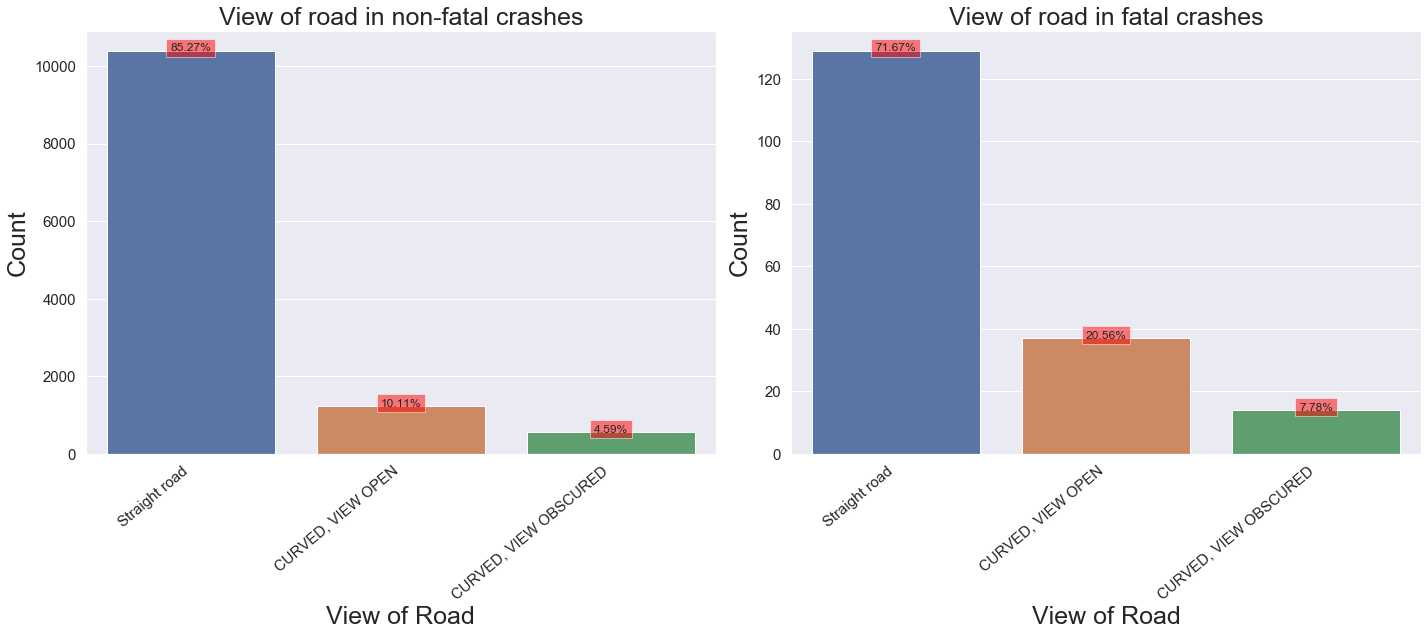

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,9))
sns.countplot(x="hor_align", data=data.loc[data['fatality']=='NotFatal'],ax=ax1, order = ['Straight road', 'CURVED, VIEW OPEN', 'CURVED, VIEW OBSCURED']);
ax1.set_title('View of road in non-fatal crashes',fontsize=25)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
sns.countplot(x="hor_align", data=data.loc[data['fatality']!='NotFatal'],ax=ax2);
ax2.set_title('View of road in fatal crashes',fontsize=25)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax1.set_xlabel('View of Road',fontsize=25)
ax1.tick_params(labelsize=15)
ax2.set_xlabel('View of Road',fontsize=25)
ax2.tick_params(labelsize=15)
ax1.set_ylabel('Count',fontsize=25)
ax2.set_ylabel('Count',fontsize=25)

print_percent(ax1,data.loc[data['fatality']=='NotFatal'])
print_percent(ax2,data.loc[data['fatality']!='NotFatal'])
plt.tight_layout()
plt.show()

In [28]:
table_summary(data, ['hor_align','fatality'],['hor_align'])

Summary table of  ['hor_align', 'fatality']


%          Total number of crashes
fatality              Fatal NotFatal                        
hor_align                                                   
CURVED, VIEW OBSCURED  2.44    97.56                     573
CURVED, VIEW OPEN      2.92    97.08                    1268
Straight road          1.23    98.77                   10516
Unknown                0.00   100.00                       4

**Observation** <br>
1.  Although the total number of casualties taken place on straight road is a lot higher, the average fatality rate is low.
2. Curved roads with open and obscured views have relatively higher fatality rates compared to straight roads.
3. This result might be due to that vehicles are difficult to drive on curved roads. 

### 3.2.12 Vertical position of casualty

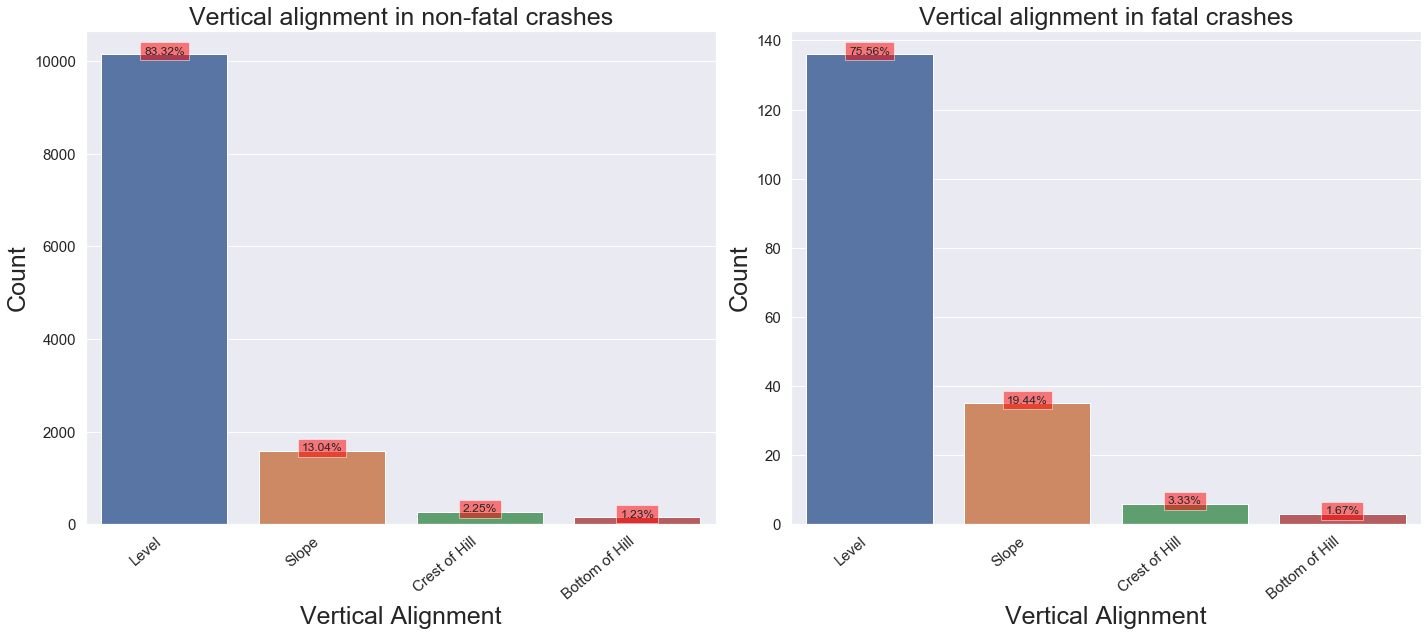

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,9))
sns.countplot(x="ver_align", data=data.loc[data['fatality']=='NotFatal'],ax=ax1, order = ['Level', 'Slope', 'Crest of Hill', 'Bottom of Hill']);
ax1.set_title('Vertical alignment in non-fatal crashes',fontsize=25)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
sns.countplot(x="ver_align", data=data.loc[data['fatality']!='NotFatal'],ax=ax2, order = ['Level', 'Slope', 'Crest of Hill', 'Bottom of Hill']);
ax2.set_title('Vertical alignment in fatal crashes',fontsize=25)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax1.set_xlabel('Vertical Alignment',fontsize=25)
ax1.tick_params(labelsize=15)
ax2.set_xlabel('Vertical Alignment',fontsize=25)
ax2.tick_params(labelsize=15)
ax1.set_ylabel('Count',fontsize=25)
ax2.set_ylabel('Count',fontsize=25)
print_percent(ax1,data.loc[data['fatality']=='NotFatal'])
print_percent(ax2,data.loc[data['fatality']!='NotFatal'])
plt.tight_layout()
plt.show()

In [30]:
table_summary(data, ['ver_align','fatality'],['ver_align'])

Summary table of  ['ver_align', 'fatality']


%          Total number of crashes
fatality       Fatal NotFatal                        
ver_align                                            
Bottom of Hill  1.96    98.04                     153
Crest of Hill   2.14    97.86                     280
Level           1.32    98.68                   10285
Slope           2.16    97.84                    1623
Unknown         0.00   100.00                      20

**Observation** <br>
1. The plots and table above summarise the vertical position taken places in accidents
2. Causalties at leveled roads have largest number of occurences with a relatively lower fatality rate
3. The fatality rates measured for bottom of hill, crest of hill and unknown vertical position might be inaccurate due to small sample size. 

### 3.2.13 Unit movement

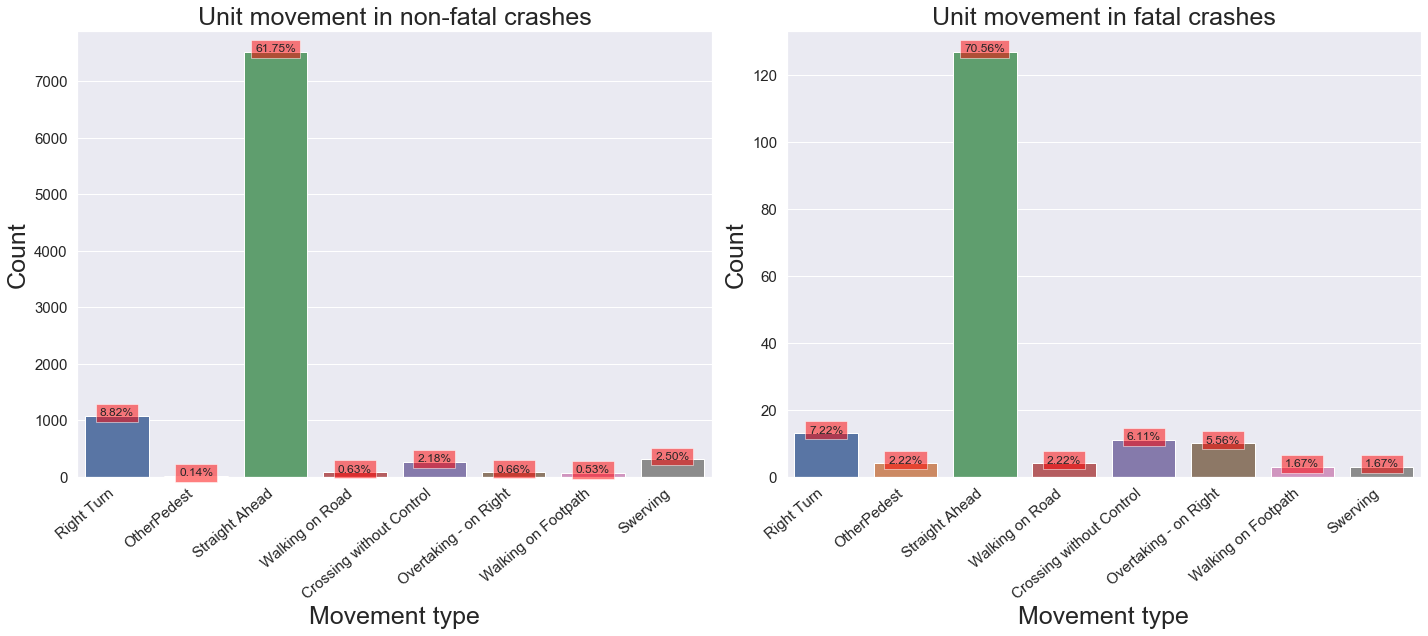

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,9))
sns.countplot(x="unit_movement", data=data.loc[data['fatality']=='NotFatal'],ax=ax1, order = ['Right Turn', 'OtherPedest', 'Straight Ahead', 'Walking on Road', 'Crossing without Control', 'Overtaking - on Right', 'Walking on Footpath', 'Swerving']);
ax1.set_title('Unit movement in non-fatal crashes',fontsize=25)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
sns.countplot(x="unit_movement", data=data.loc[data['fatality']!='NotFatal'],ax=ax2, order = ['Right Turn', 'OtherPedest', 'Straight Ahead', 'Walking on Road', 'Crossing without Control', 'Overtaking - on Right', 'Walking on Footpath', 'Swerving']);
ax2.set_title('Unit movement in fatal crashes',fontsize=25)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax1.set_xlabel('Movement type',fontsize=25)
ax1.tick_params(labelsize=15)
ax2.set_xlabel('Movement type',fontsize=25)
ax2.tick_params(labelsize=15)
ax1.set_ylabel('Count',fontsize=25)
ax2.set_ylabel('Count',fontsize=25)
print_percent(ax1,data.loc[data['fatality']=='NotFatal'])
print_percent(ax2,data.loc[data['fatality']!='NotFatal'])
plt.tight_layout()
plt.show()

In [32]:
table = table_summary(data, ['unit_movement','fatality'],['unit_movement'])
table.sort_values(by=('%','Fatal'),ascending=False)[:]

Summary table of  ['unit_movement', 'fatality']


%          Total number of crashes
fatality                       Fatal NotFatal                        
unit_movement                                                        
OtherPedest                    19.05    80.95                      21
Unparking -Angle               16.67    83.33                       6
Overtaking - on Right          11.11    88.89                      90
Alighted from Parked Vehicle    6.25    93.75                      16
Walking on Road                 4.94    95.06                      81
Walking on Footpath             4.41    95.59                      68
Crossing without Control        3.99    96.01                     276
Straight Ahead                  1.66    98.34                    7649
Right Turn                      1.20    98.80                    1087
Swerving                        0.98    99.02                     307
U Turn                          0.97    99.03                     103
Left Turn                       0.44    99.56                     227
Stopped on Carriageway          0.05    99.95                    2009
On Pedestrian Crossing          0.00   100.00                      17
UnParking - Parallel            0.00   100.00                      11
Reversing                       0.00   100.00                       7
Pushing or Working on Vehicle   0.00   100.00                      17
Parking - Parallel              0.00   100.00                       7
Crossing with Traffic Signals   0.00   100.00                     105
Parked                          0.00   100.00                      51
Entering Private Driveway       0.00   100.00                      74
Overtaking - on Left            0.00   100.00                      26
Leaving Private Driveway        0.00   100.00                     102
Other                           0.00   100.00                       3
Parking - Angle                 0.00   100.00                       1

**Observation** <br>
1. the plots above show that most causalties were from driving stright ahead, but the proportion of causalties driving straight ahead are similar in both fatal and non-fatal group, indicating no clear difference.
2. According to summary table above, the fatal rates might not be accurate as shown due to smaller sample size.

### 3.2.14 Area type

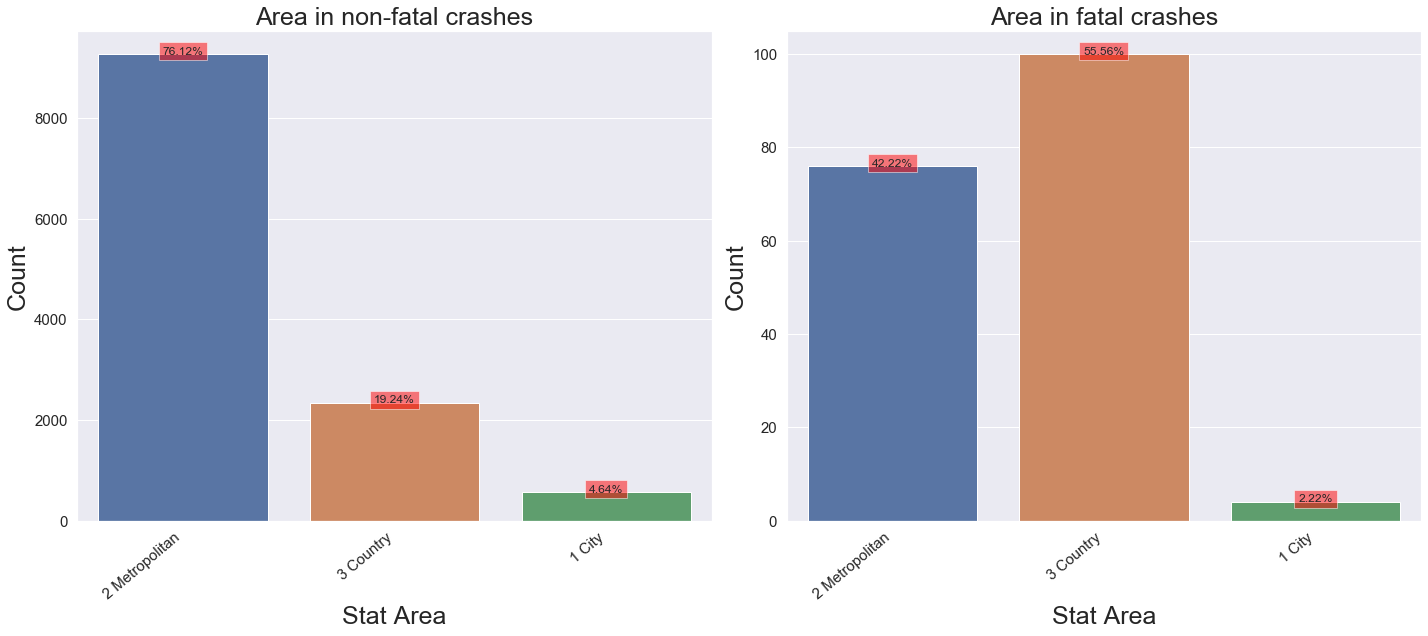

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,9))
sns.countplot(x="stat_area", data=data.loc[data['fatality']=='NotFatal'],ax=ax1);
ax1.set_title('Area in non-fatal crashes',fontsize=25)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
sns.countplot(x="stat_area", data=data.loc[data['fatality']!='NotFatal'],ax=ax2);
ax2.set_title('Area in fatal crashes',fontsize=25)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax1.set_xlabel('Stat Area',fontsize=25)
ax1.tick_params(labelsize=15)
ax2.set_xlabel('Stat Area',fontsize=25)
ax2.tick_params(labelsize=15)
ax1.set_ylabel('Count',fontsize=25)
ax2.set_ylabel('Count',fontsize=25)

print_percent(ax1,data.loc[data['fatality']=='NotFatal'])
print_percent(ax2,data.loc[data['fatality']!='NotFatal'])
plt.tight_layout()
plt.show()

In [38]:
table_summary(data, ['stat_area','fatality'],['stat_area'])

Summary table of  ['stat_area', 'fatality']


%          Total number of crashes
fatality       Fatal NotFatal                        
stat_area                                            
1 City          0.70    99.30                     569
2 Metropolitan  0.81    99.19                    9348
3 Country       4.09    95.91                    2444

**Observation** <br>

1.  Most causalties occured in the country rural areas and fatal rate is 4.09, which is higher than other groups. Possibly Due to area/speed and other factors
2. Metro areas are similar, this could be due to higher densely populated areas."

Why are there so many more fatalities in the country compared to City and Metropolitan areas?

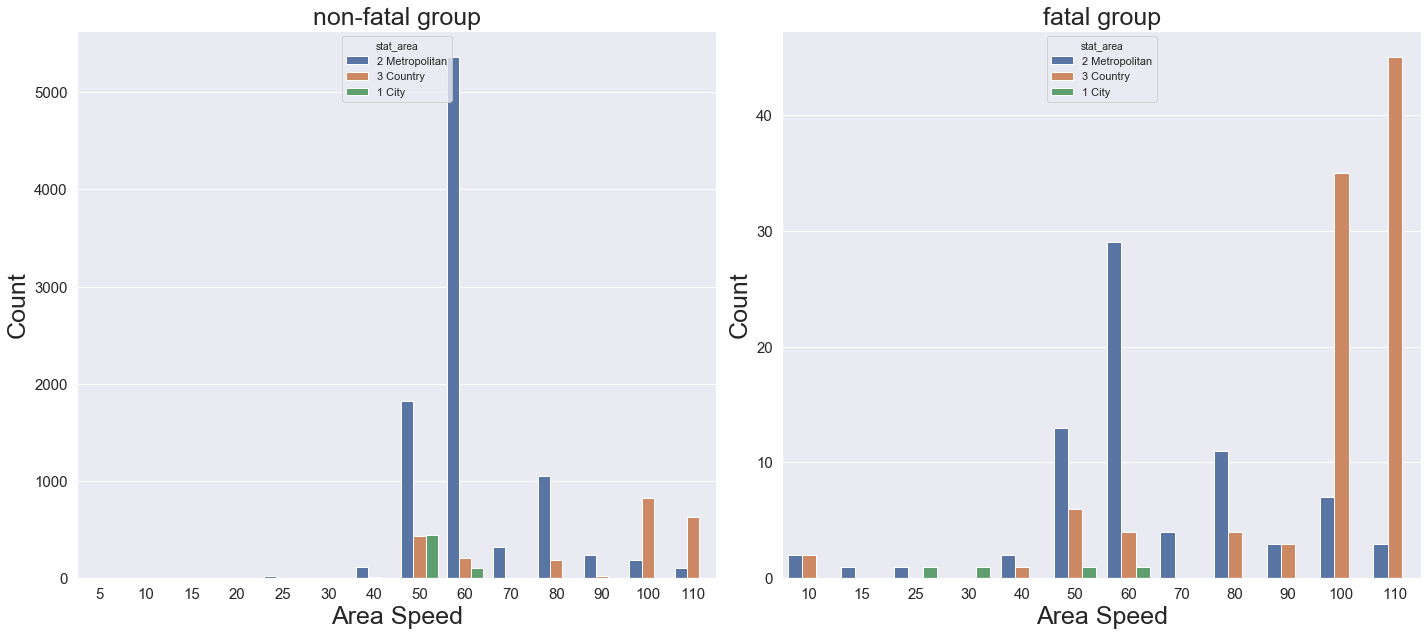

In [86]:
not_fatal = data.loc[data['fatality']=='NotFatal']
fatal = data.loc[data['fatality']!='NotFatal']
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,9))
sns.countplot(x="area_speed", hue='stat_area',data=data.loc[data['fatality']=='NotFatal'],ax=ax1)
ax1.set_title('non-fatal group',fontsize=25)

sns.countplot(x="area_speed", hue='stat_area',data=data.loc[data['fatality']!='NotFatal'],ax=ax2)
ax2.set_title('fatal group',fontsize=25)
ax1.set_xlabel('Area Speed',fontsize=25)
ax1.tick_params(labelsize=15)
ax2.set_xlabel('Area Speed',fontsize=25)
ax2.tick_params(labelsize=15)
ax1.set_ylabel('Count',fontsize=25)
ax2.set_ylabel('Count',fontsize=25)

plt.tight_layout()
plt.show()

**Observation** <br>

1.  Most causalties in the country rural areas had speeds of 100-110km. Far higher than Metropolitan and City areas.

### 3.2.15 Day

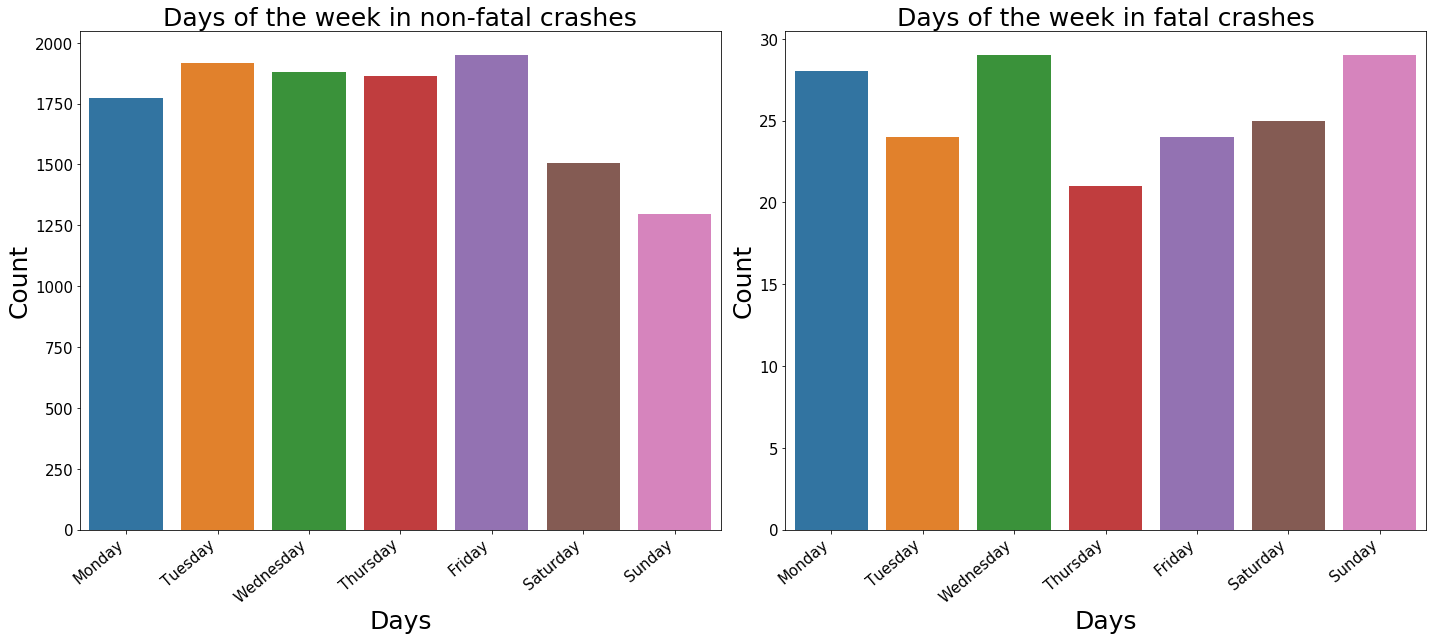

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,9))
sns.countplot(x="day", data=data.loc[data['fatality']=='NotFatal'],ax=ax1, order = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']);
ax1.set_title('Days of the week in non-fatal crashes',fontsize=25)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
sns.countplot(x="day", data=data.loc[data['fatality']!='NotFatal'],ax=ax2, order = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']);
ax2.set_title('Days of the week in fatal crashes',fontsize=25)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax1.set_xlabel('Days',fontsize=25)
ax1.tick_params(labelsize=15)
ax2.set_xlabel('Days',fontsize=25)
ax2.tick_params(labelsize=15)
ax1.set_ylabel('Count',fontsize=25)
ax2.set_ylabel('Count',fontsize=25)

plt.tight_layout()
plt.show()

In [40]:
table_summary(data, ['day','fatality'],['day'])

Summary table of  ['day', 'fatality']


%          Total number of crashes
fatality  Fatal NotFatal                        
day                                             
Friday     1.22    98.78                    1973
Monday     1.55    98.45                    1802
Saturday   1.63    98.37                    1531
Sunday     2.19    97.81                    1325
Thursday   1.12    98.88                    1883
Tuesday    1.24    98.76                    1940
Wednesday  1.52    98.48                    1907

**Observation** <br>
1. plots show no clear difference in terms of proportion in both fatal and non-fatal groups.
2. Summary table above indicates that, sunday has the highest fatal rate, suggesting there are fatalites are more likely to take place on Sunday, even though the total number of crashes is lower compared to other days of the week. 

### 3.2.16 Licence type

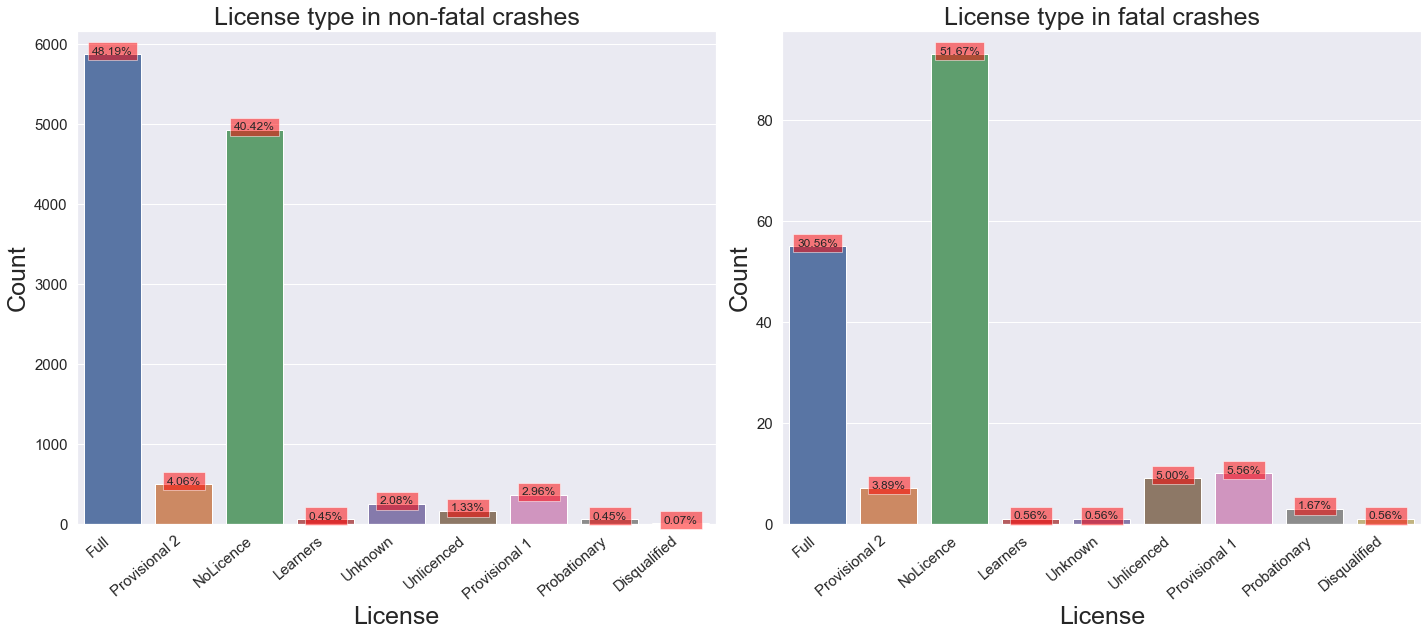

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,9))
sns.countplot(x="lic_type", data=data.loc[data['fatality']=='NotFatal'],ax=ax1, order = ['Full', 'Provisional 2', 'NoLicence', 'Learners', 'Unknown', 'Unlicenced', 'Provisional 1 ', 'Probationary', 'Disqualified']);
ax1.set_title('License type in non-fatal crashes',fontsize=25)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
sns.countplot(x="lic_type", data=data.loc[data['fatality']!='NotFatal'],ax=ax2, order = ['Full', 'Provisional 2', 'NoLicence', 'Learners', 'Unknown', 'Unlicenced', 'Provisional 1 ', 'Probationary', 'Disqualified']);
ax2.set_title('License type in fatal crashes',fontsize=25)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax1.set_xlabel('License',fontsize=25)
ax1.tick_params(labelsize=15)
ax2.set_xlabel('License',fontsize=25)
ax2.tick_params(labelsize=15)
ax1.set_ylabel('Count',fontsize=25)
ax2.set_ylabel('Count',fontsize=25)

print_percent(ax1,data.loc[data['fatality']=='NotFatal'])
print_percent(ax2,data.loc[data['fatality']!='NotFatal'])
plt.tight_layout()
plt.show()

In [42]:
table_summary(data, ['lic_type','fatality'],['lic_type'])

Summary table of  ['lic_type', 'fatality']


%          Total number of crashes
fatality        Fatal NotFatal                        
lic_type                                              
Disqualified    11.11    88.89                       9
Full             0.93    99.07                    5925
Learners         1.79    98.21                      56
NoLicence        1.85    98.15                    5016
Probationary     5.17    94.83                      58
Provisional 1    2.70    97.30                     371
Provisional 2    1.40    98.60                     501
Unknown          0.39    99.61                     254
Unlicenced       5.26    94.74                     171

**Observation** <br>

1. Full license drivers are less likely to have a fatal accident
2. Provisional 1, Probationary, Unlicenced,and  Disqualified are found to have much higher fatality rates, but the substantial result is not guaranteed due to the relatively small sample size

### 3.2.17 Other features

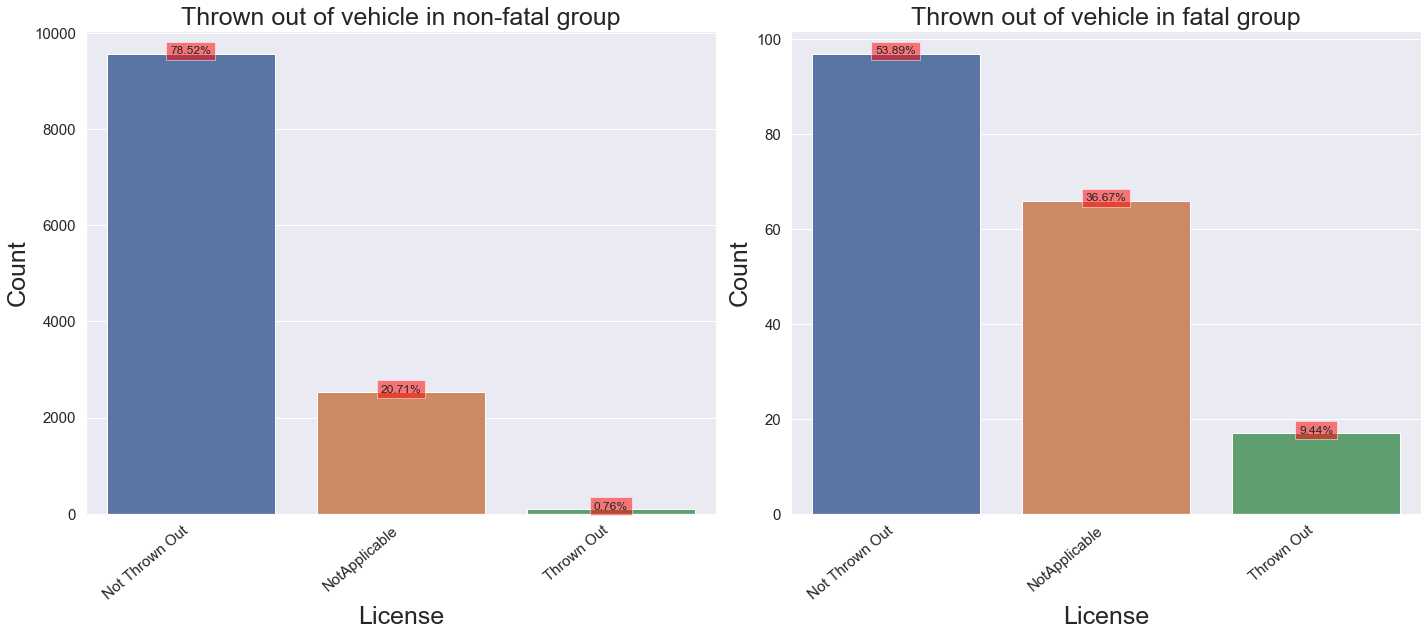

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,9))
sns.countplot(x="thrown_out", data=data.loc[data['fatality']=='NotFatal'],ax=ax1);
ax1.set_title('Thrown out of vehicle in non-fatal group',fontsize=25)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
sns.countplot(x="thrown_out", data=data.loc[data['fatality']!='NotFatal'],ax=ax2);
ax2.set_title('Thrown out of vehicle in fatal group',fontsize=25)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax1.set_xlabel('License',fontsize=25)
ax1.tick_params(labelsize=15)
ax2.set_xlabel('License',fontsize=25)
ax2.tick_params(labelsize=15)
ax1.set_ylabel('Count',fontsize=25)
ax2.set_ylabel('Count',fontsize=25)

print_percent(ax1,data.loc[data['fatality']=='NotFatal'])
print_percent(ax2,data.loc[data['fatality']!='NotFatal'])
plt.tight_layout()
plt.show()

In [44]:
table_summary(data, ['thrown_out','fatality'],['thrown_out'])

Summary table of  ['thrown_out', 'fatality']


%          Total number of crashes
fatality        Fatal NotFatal                        
thrown_out                                            
Not Thrown Out   1.00    99.00                    9662
NotApplicable    2.55    97.45                    2589
Thrown Out      15.45    84.55                     110

**Observation** <br>
1. Occupants thrown out of a vehicle, with substantially higher fate rate, are much morely likely to occur within a fatality.
2. This result might be due to a strong correlation on whether seatbelts were used or not.

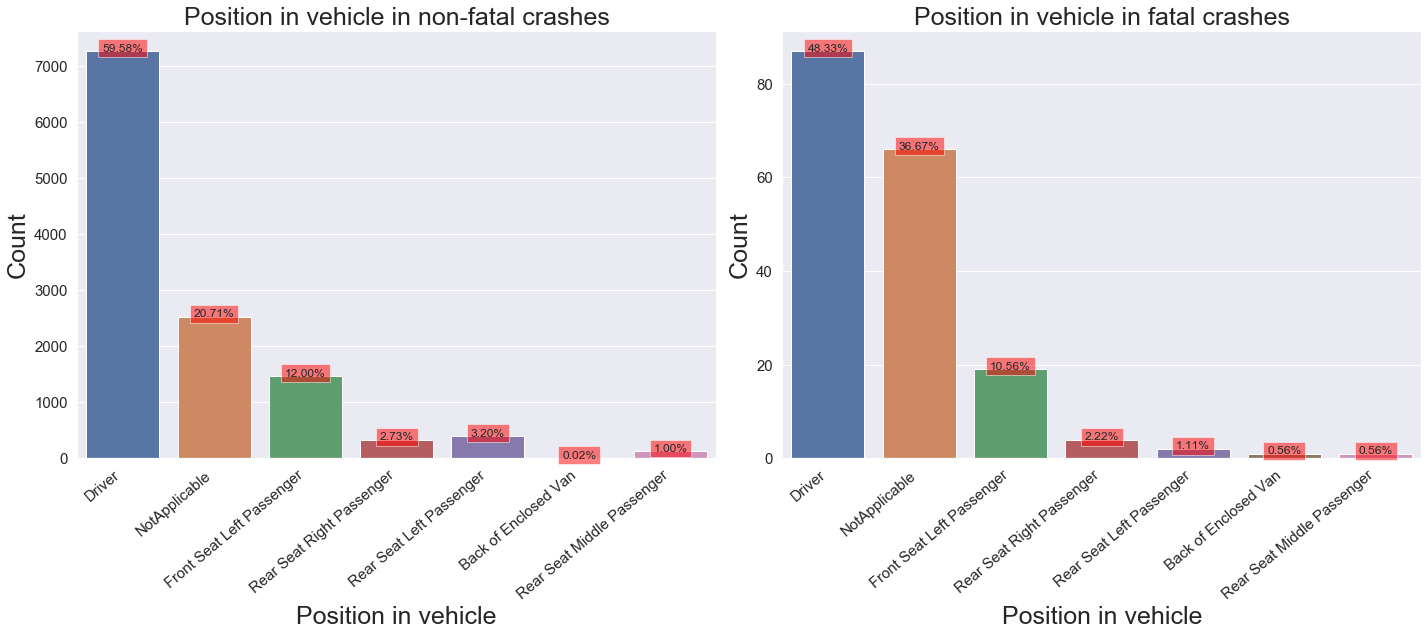

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,9))
sns.countplot(x="cas_pos_in_veh", data=data.loc[data['fatality']=='NotFatal'],ax=ax1, order = ['Driver', 'NotApplicable', 'Front Seat Left Passenger', 'Rear Seat Right Passenger', 'Rear Seat Left Passenger', 'Back of Enclosed Van', 'Rear Seat Middle Passenger']);
ax1.set_title('Position in vehicle in non-fatal crashes',fontsize=25)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
sns.countplot(x="cas_pos_in_veh", data=data.loc[data['fatality']!='NotFatal'],ax=ax2, order = ['Driver', 'NotApplicable', 'Front Seat Left Passenger', 'Rear Seat Right Passenger', 'Rear Seat Left Passenger', 'Back of Enclosed Van', 'Rear Seat Middle Passenger']);
ax2.set_title('Position in vehicle in fatal crashes',fontsize=25)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax1.set_xlabel('Position in vehicle',fontsize=25)
ax1.tick_params(labelsize=15)
ax2.set_xlabel('Position in vehicle',fontsize=25)
ax2.tick_params(labelsize=15)
ax1.set_ylabel('Count',fontsize=25)
ax2.set_ylabel('Count',fontsize=25)
print_percent(ax1,data.loc[data['fatality']=='NotFatal'])
print_percent(ax2,data.loc[data['fatality']!='NotFatal'])
plt.tight_layout()
plt.show()

In [46]:
table_summary(data, ['cas_pos_in_veh','fatality'],['cas_pos_in_veh'])

Summary table of  ['cas_pos_in_veh', 'fatality']


%          Total number of crashes
fatality                              Fatal NotFatal                        
cas_pos_in_veh                                                              
Back of Enclosed Van                  33.33    66.67                       3
Driver                                 1.18    98.82                    7345
Front Seat Left Passenger              1.28    98.72                    1481
Front Seat Middle Passenger            0.00   100.00                       8
NotApplicable                          2.55    97.45                    2589
Other                                  0.00   100.00                      33
Passenger of Motorcycle                0.00   100.00                      28
Passenger on Multi-Passenger Vehicle   0.00   100.00                      23
Rear Seat Left Passenger               0.51    99.49                     392
Rear Seat Middle Passenger             0.81    99.19                     123
Rear Seat Right Passenger              1.19    98.81                     336

**Observation** <br>

1. Drivers and Front seat passengers have a higher chance of being involved within an accident which is expected.
2. The table shows no substantial result due to small sample size or low fatal rate.

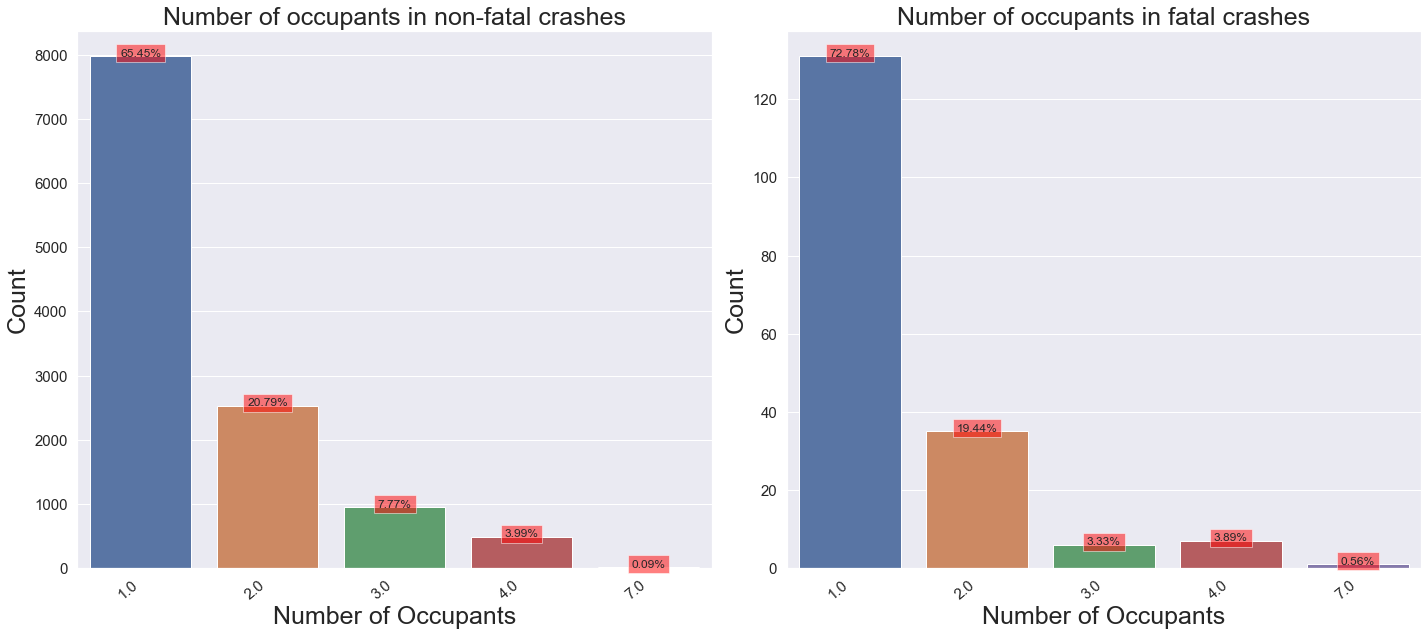

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,9))
sns.countplot(x="n_occupants", data=data.loc[data['fatality']=='NotFatal'],ax=ax1, order = [1.0, 2.0, 3.0, 4.0, 7.0]);
ax1.set_title('Number of occupants in non-fatal crashes',fontsize=25)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
sns.countplot(x="n_occupants", data=data.loc[data['fatality']!='NotFatal'],ax=ax2, order = [1.0, 2.0, 3.0, 4.0, 7.0]);
ax2.set_title('Number of occupants in fatal crashes',fontsize=25)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax1.set_xlabel('Number of Occupants',fontsize=25)
ax1.tick_params(labelsize=15)
ax2.set_xlabel('Number of Occupants',fontsize=25)
ax2.tick_params(labelsize=15)
ax1.set_ylabel('Count',fontsize=25)
ax2.set_ylabel('Count',fontsize=25)

print_percent(ax1,data.loc[data['fatality']=='NotFatal'])
print_percent(ax2,data.loc[data['fatality']!='NotFatal'])
plt.tight_layout()
plt.show()

**Observation** <br>
1. Drivers driving by themselves tend to get into accidents more frequently, this could be due to Drivers driving more carefully with more occupants
2. Difference between two groups are not clear. No apparent relationship between Number of occupants and fatalities

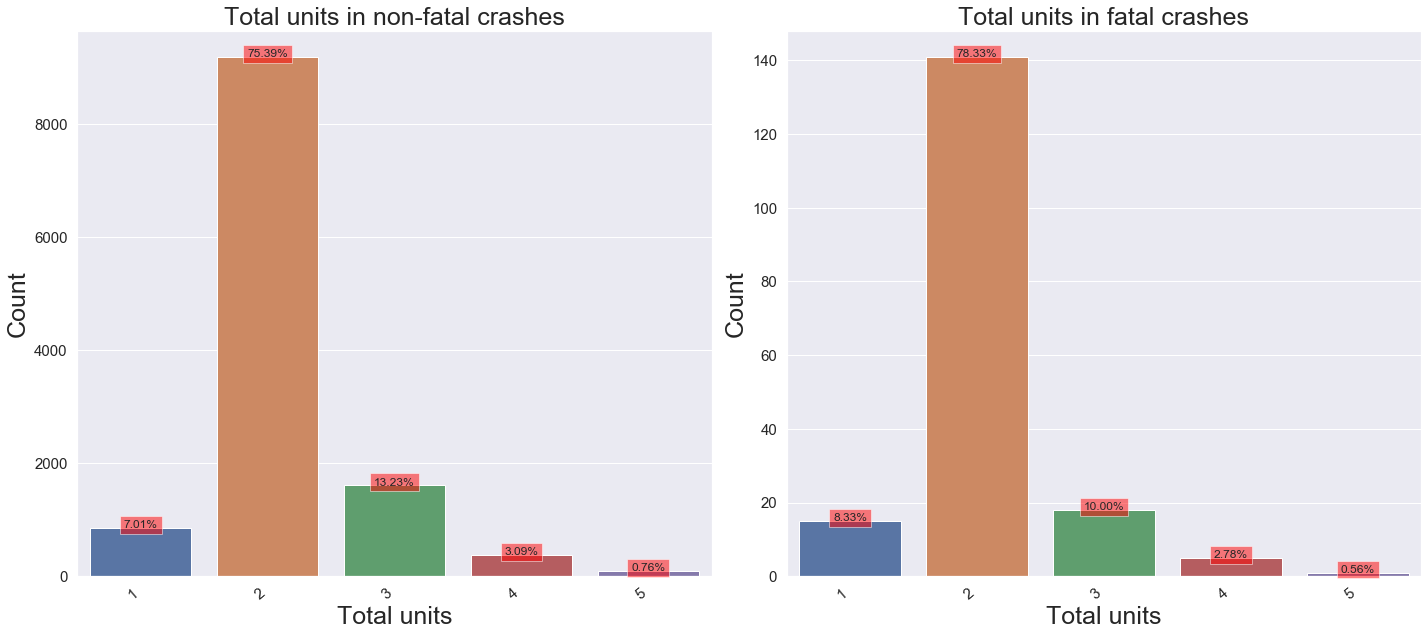

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,9))
sns.countplot(x="total_units", data=data.loc[data['fatality']=='NotFatal'],ax=ax1, order = [1, 2, 3, 4, 5]);
ax1.set_title('Total units in non-fatal crashes',fontsize=25)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
sns.countplot(x="total_units", data=data.loc[data['fatality']!='NotFatal'],ax=ax2, order = [1, 2, 3, 4, 5]);
ax2.set_title('Total units in fatal crashes',fontsize=25)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax1.set_xlabel('Total units',fontsize=25)
ax1.tick_params(labelsize=15)
ax2.set_xlabel('Total units',fontsize=25)
ax2.tick_params(labelsize=15)
ax1.set_ylabel('Count',fontsize=25)
ax2.set_ylabel('Count',fontsize=25)

print_percent(ax1,data.loc[data['fatality']=='NotFatal'])
print_percent(ax2,data.loc[data['fatality']!='NotFatal'])
plt.tight_layout()
plt.show()

**Observation** <br>
1. Casualties involved with 2 units have a higher occurance rate of crashes compared to 1, 3 and 4
2. Both graphs so a right skewed distribution for between groups. 
3. No clear relationship between Total units and fatalities

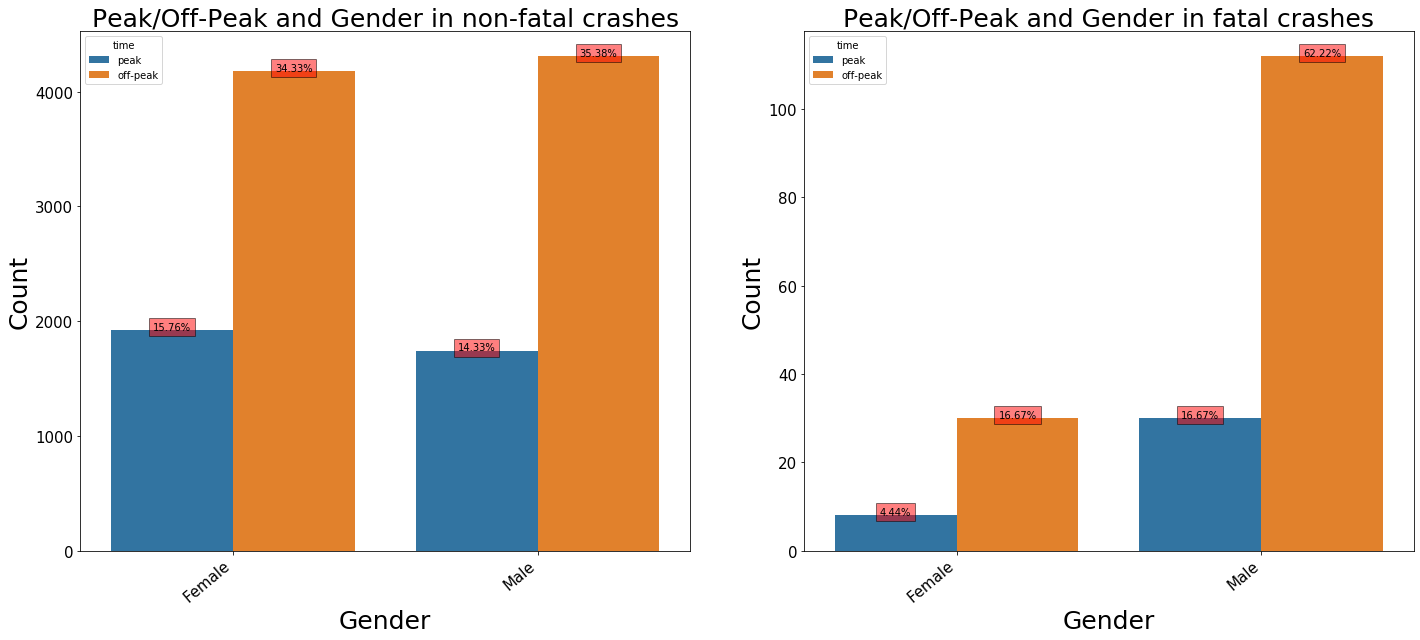

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,9))
sns.countplot(x="cas_gender", hue='time',data=data.loc[data['fatality']=='NotFatal'],ax=ax1, order = ['Female', 'Male']);
ax1.set_title('Peak/Off-Peak and Gender in non-fatal crashes',fontsize=25)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
sns.countplot(x="cas_gender", hue='time',data=data.loc[data['fatality']!='NotFatal'],ax=ax2, order = ['Female', 'Male']);
ax2.set_title('Peak/Off-Peak and Gender in fatal crashes',fontsize=25)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax1.set_xlabel('Gender',fontsize=25)
ax1.tick_params(labelsize=15)
ax2.set_xlabel('Gender',fontsize=25)
ax2.tick_params(labelsize=15)
ax1.set_ylabel('Count',fontsize=25)
ax2.set_ylabel('Count',fontsize=25)

print_percent(ax1,data.loc[data['fatality']=='NotFatal'])
print_percent(ax2,data.loc[data['fatality']!='NotFatal'])
plt.tight_layout()
plt.show()

In [13]:
table_summary(data, ['time','fatality'],['time'])

Summary table of  ['time', 'fatality']


%          Total number of crashes
fatality Fatal NotFatal                        
time                                           
off-peak  1.64    98.36                    8647
peak      1.02    98.98                    3714

**Observation** <br>
1. Crashes occur more frequently off peak, this could be due to higher road speeds and traffic conditions
2. There is not much of a difference between genders for non-fatal accidents, however male drivers have a higher possibility of more fatalities compared to females."

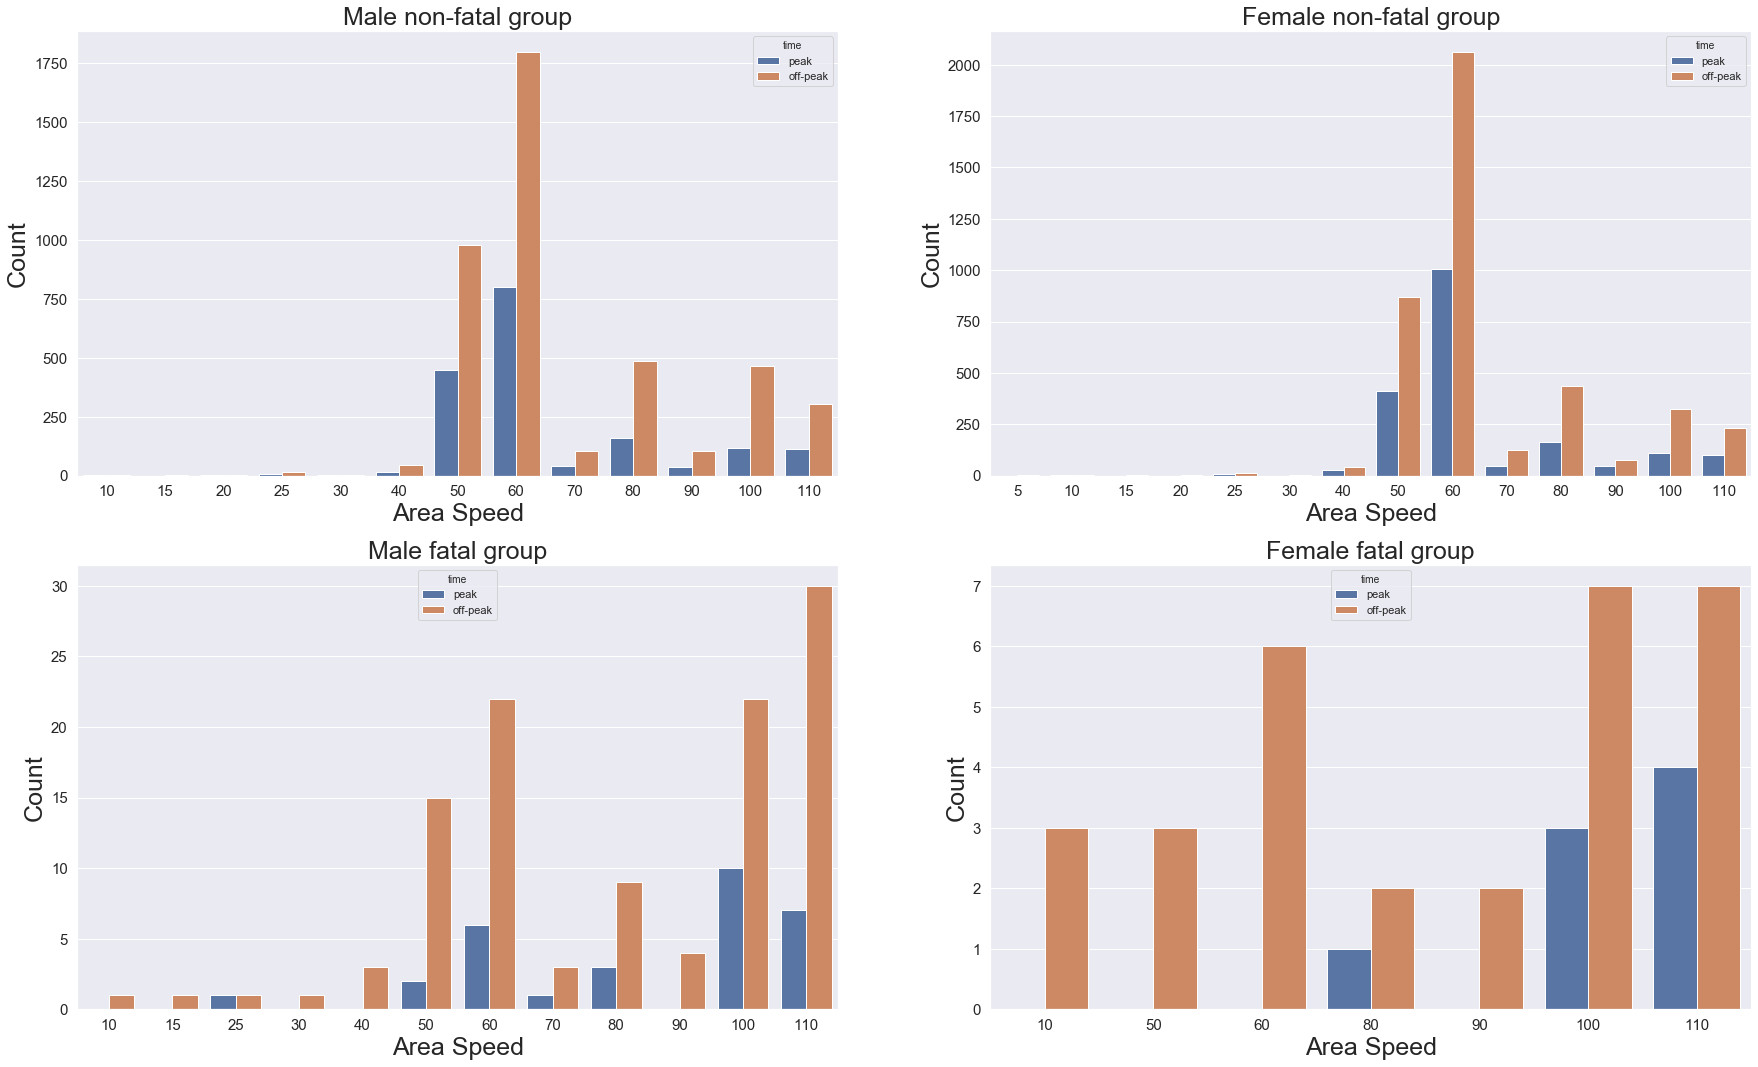

In [53]:
not_fatal = data.loc[data['fatality']=='NotFatal']
fatal = data.loc[data['fatality']!='NotFatal']
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2,figsize=(30,18))
sns.catplot(x="area_speed", hue='time',data=not_fatal[not_fatal['cas_gender']=='Male'],ax=ax1,kind="count", hue_order=['peak','off-peak'])
ax1.set_title('Male non-fatal group',fontsize=25)

sns.catplot(x="area_speed", hue='time',data=not_fatal[not_fatal['cas_gender']=='Female'],ax=ax2,kind="count", hue_order=['peak','off-peak'])
ax2.set_title('Female non-fatal group',fontsize=25)

sns.catplot(x="area_speed", hue='time',data=fatal[fatal['cas_gender']=='Male'],ax=ax3,kind="count", hue_order=['peak','off-peak'])
ax3.set_title('Male fatal group',fontsize=25)

sns.catplot(x="area_speed", hue='time',data=fatal[fatal['cas_gender']=='Female'],ax=ax4,kind="count", hue_order=['peak','off-peak'])
ax4.set_title('Female fatal group',fontsize=25)
ax1.set_xlabel('Area Speed',fontsize=25)
ax1.tick_params(labelsize=15)
ax2.set_xlabel('Area Speed',fontsize=25)
ax2.tick_params(labelsize=15)
ax1.set_ylabel('Count',fontsize=25)
ax2.set_ylabel('Count',fontsize=25)

ax3.set_xlabel('Area Speed',fontsize=25)
ax3.tick_params(labelsize=15)
ax4.set_xlabel('Area Speed',fontsize=25)
ax4.tick_params(labelsize=15)
ax3.set_ylabel('Count',fontsize=25)
ax4.set_ylabel('Count',fontsize=25)
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.show()

**Observation** <br>

1. Most common occurences for non-fatalities are with area speeds of 50-60km/hr for both genders.
2. Fatalities are much more likely to occur at 100-110km/hr for both genders.

## 3.3 Dicussion

In this notebook we have examined the relationship of features and label in the cleaned dataset, and produced some remarkable results. Area speed, age, use of seat belt, gender, days are confidently found to have significant impact on chance of causalties being fatal in road accidents. Although some features have distinctive effect on the label investigated, the small sample sizes of these groups might not be enough to support the result. As such, this data exploration might only give us some insights on what features would more explanatory power on targeted label. In next notebook- feature selection, we aim to identify the most significant features by using feature selection methods in attempting to reduce the dimensionalty of the dataset for better modelling. 